# 데이터 전처리

## 데이터 준비

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
# column_stack() 함수의 파라미터로 Python의 tuple을 전달

np.column_stack(([1, 2, 3], [4, 5, 6])) # tuple은 list와 다르게 변동이 안됨!

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
# target 데이터 만들기

print(np.zeros(5))
print(np.ones(5))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


In [6]:
# target 데이터 만들기

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## train data set와 test data set 나누기

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 위에 과정과 결과는 같지만 훨씬 간결함
# train_test_split 함수는 기본적으로 25% 테스트 데이터로 분할
# stratify = fish_target : 클배스 비율에 맞게 데이터를 분할

train_input, test_input, train_target, test_target =  train_test_split(fish_data, fish_target, random_state=42)

In [10]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [11]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [12]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kn = KNeighborsClassifier()

In [15]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [16]:
print(kn.predict([[25, 150]]))

[0.]


In [17]:
import matplotlib.pyplot as plt

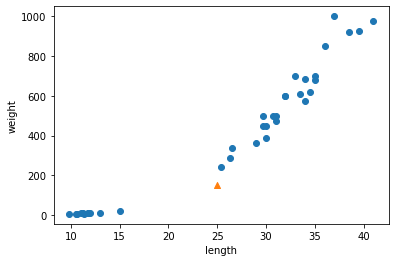

In [18]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^") # caret 문자
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [19]:
distance, indexes = kn.kneighbors([[25, 150]])
# 만들어진 distance, indexes 는 배열

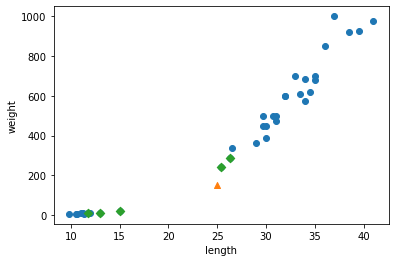

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [21]:
print(distance)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


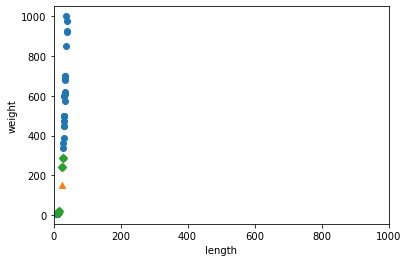

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker="D")
plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# feature(length, weight) 특성의 범위가 다르다, scale

In [23]:
# 표준점수(standard score) 사용하여 전처리
# 각 특성 값이 평균에서 표준편차의 몇배 만큼 떨어져있는지

mean = np.mean(train_input, axis =0)
std = np.std(train_input, axis =0)

In [24]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [25]:
# broadcasting

train_scaled = (train_input - mean) / std

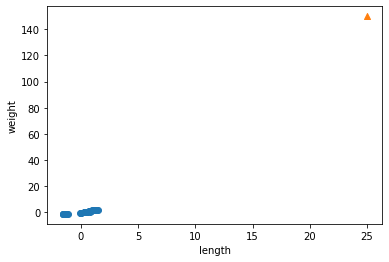

In [26]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [27]:
new = ([25, 150] - mean) / std

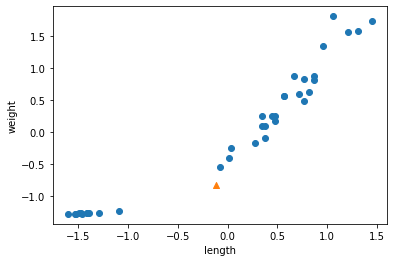

In [28]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [29]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [30]:
test_scaled = (test_input - mean) / std

In [31]:
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


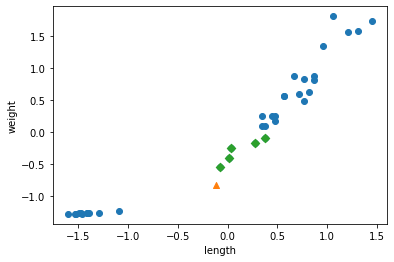

In [40]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = "^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
# feature(length, weight) 값이 scale에 영향을 받지 않도록 만들면 안정적인 예측 가능